<a href="https://colab.research.google.com/github/Ahmdridwan28/image-Segmentation/blob/main/image_Segmentation1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

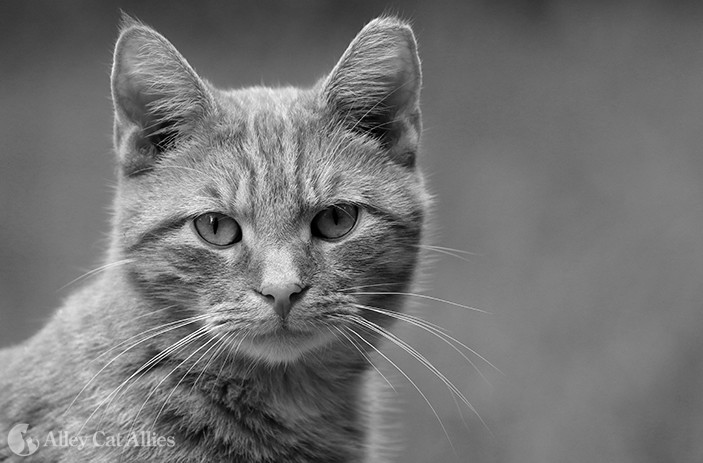

In [3]:
Image = cv2.imread('/content/gdrive/MyDrive/Foto/Oyen_Cat.jpg', 0)
cv2_imshow(Image)

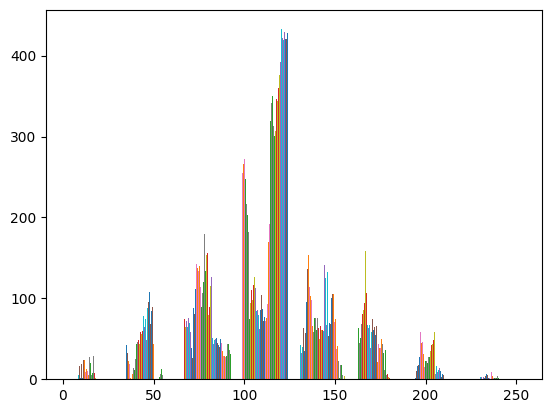

In [4]:
x = Image
plt.hist(x, bins=8)
plt.show()

In [5]:
smoothing = np.array([[1,1,1],
                      [1,1,1],
                      [1,1,1]])

sharpening = np.array([[0, -1, 0],
                       [-1, 5, -1],
                       [0, -1, 0]])

filter1 = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

filter2 = np.array([[1,2,1],
                    [0,0,0],
                    [-1,-2,-1]])

filter3 = np.array([[-1, -1, -1],
                    [-1, 8, -1],
                    [-1, -1, -1]])

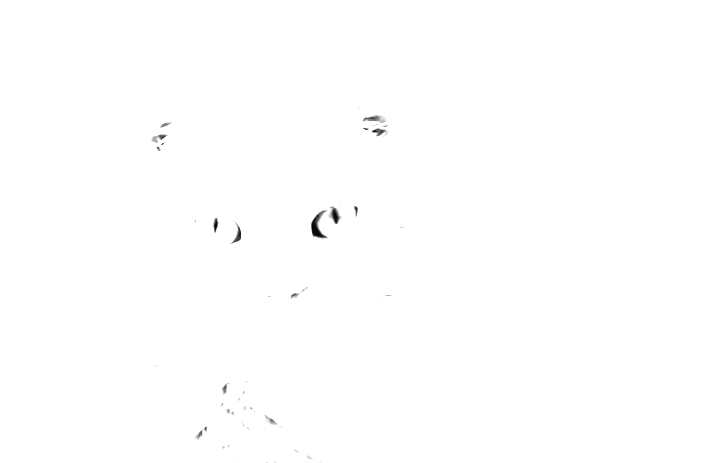

In [6]:
#Smooth image
smooth_Image = cv2.filter2D(Image, ddepth=-1, kernel=smoothing)
cv2_imshow(smooth_Image)

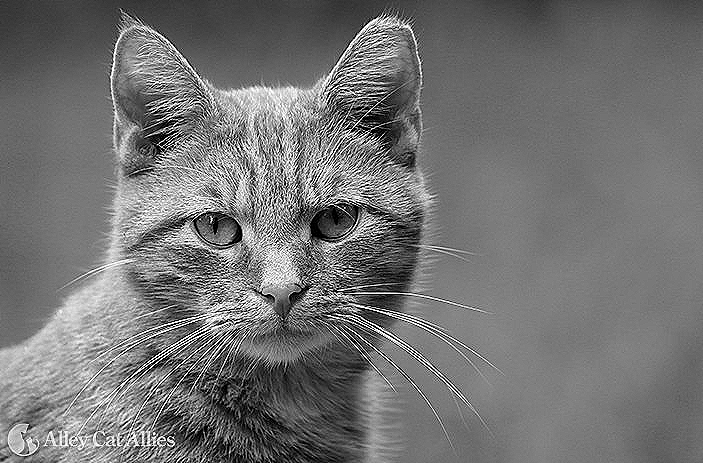

In [7]:
#sharpening
sharpening_Image = cv2.filter2D(Image, ddepth=-1, kernel=sharpening)
cv2_imshow(sharpening_Image)

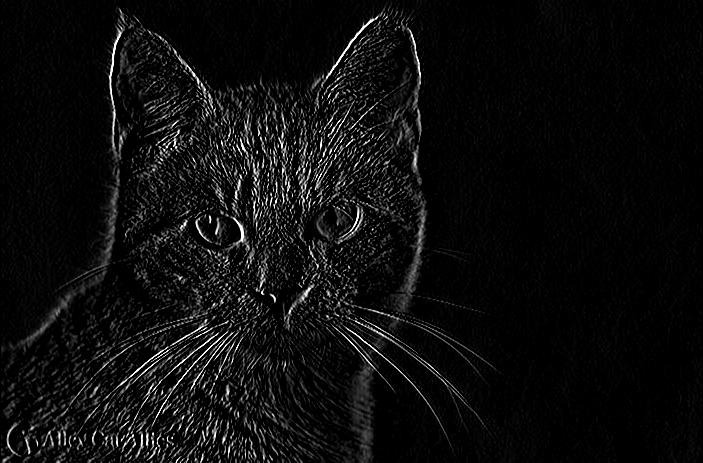

In [8]:
#sobel
edge_Image = cv2.filter2D(Image, ddepth=-1, kernel=filter1)
cv2_imshow(edge_Image)

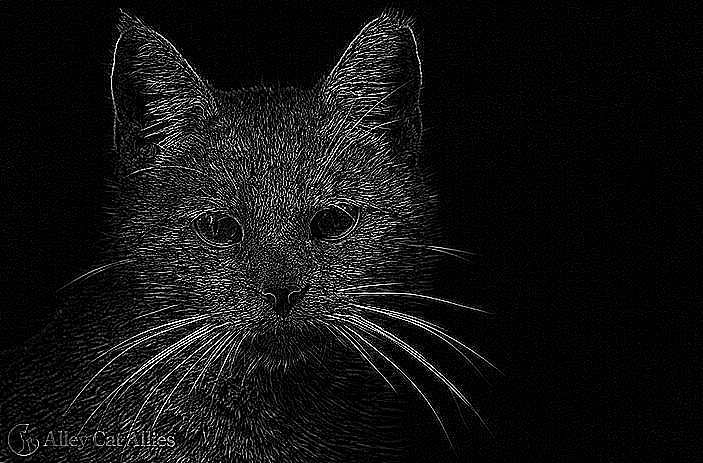

In [10]:
#edge detection
edge_Image = cv2.filter2D(Image, ddepth=-1, kernel=filter3)
cv2_imshow(edge_Image)

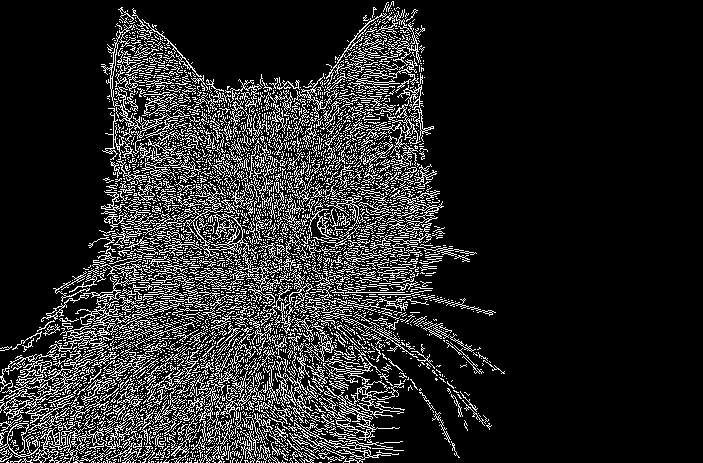

In [11]:
#canny
edge_Image = cv2.Canny(sharpening_Image, 50, 170)
cv2_imshow(edge_Image)

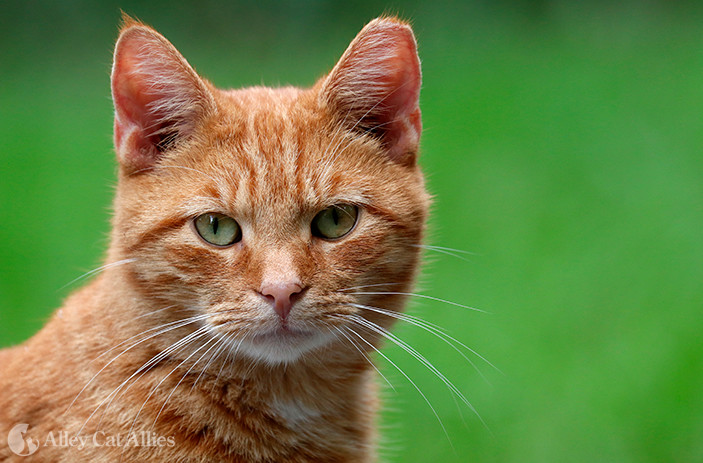

In [12]:
#similir Approach : clustering with K-MEANS
Image1 = cv2.imread('/content/gdrive/MyDrive/Foto/Oyen_Cat.jpg')
cv2_imshow(Image1)

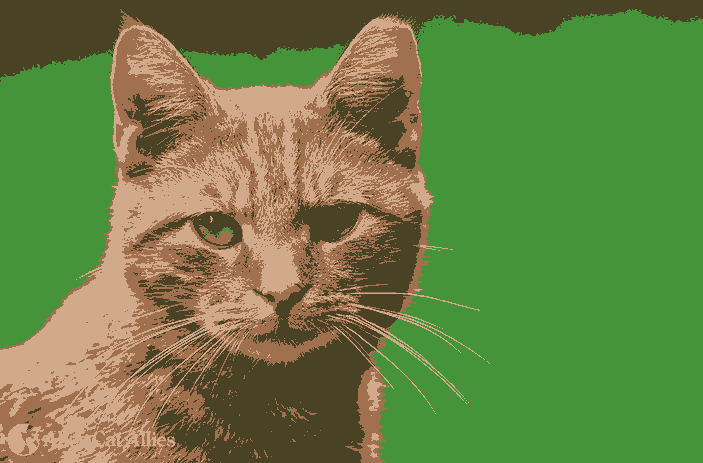

In [15]:
# Reshaping image menjadi array 2D: pixel & channel
nilai_pixel = Image1.reshape((-1,3))
# Ubah menjadi float
nilai_pixel = np.float32(nilai_pixel)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)
# Melakukan clustering dengan jumlah cluster = 3
k = 4
retval, labels, centers = cv2.kmeans(nilai_pixel, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
# ubah centroid menjadi int karena image perlu nilai int
centers = np.uint8(centers)
# tetapkan centroid ke tiap label pixel
segmented_data = centers[labels.flatten()]
# reshape data into the original image dimensions
segmented_image = segmented_data.reshape((Image1.shape))
cv2_imshow(segmented_image)